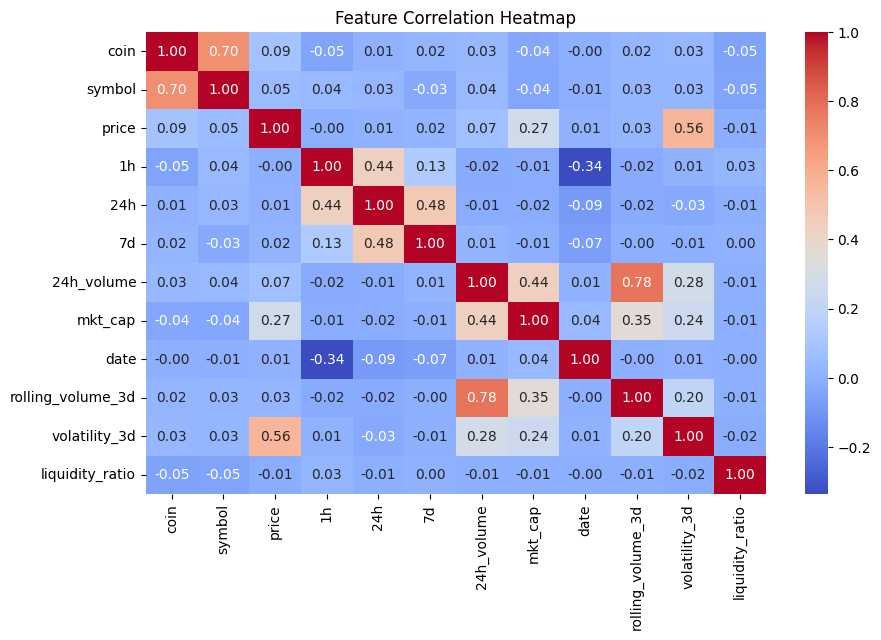

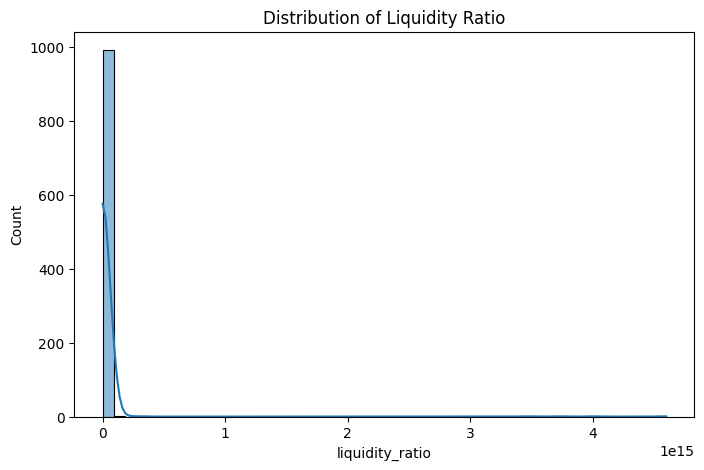

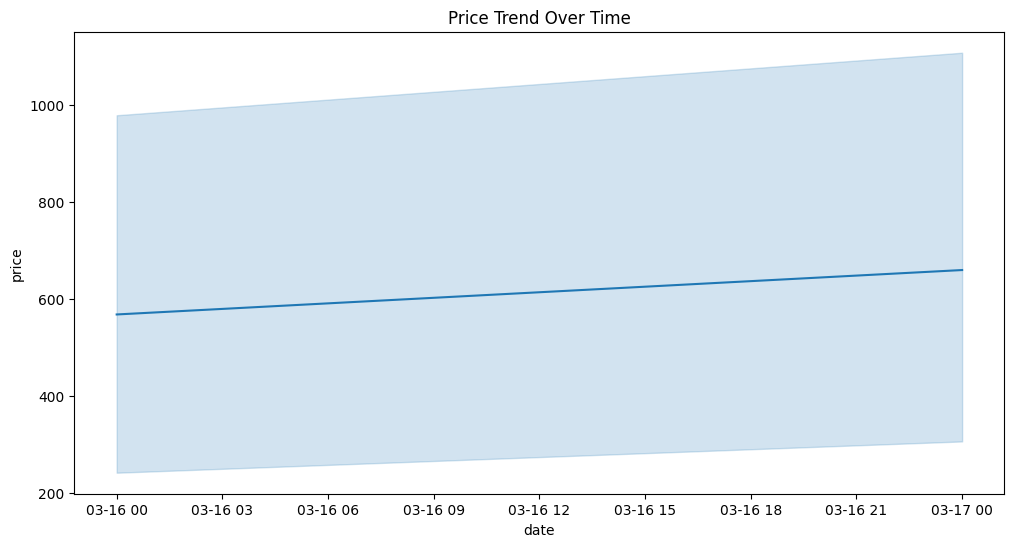

✅ RMSE: 14877429463445.4883
✅ MAE: 1340095388699.0862
✅ R² Score: 0.4880


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load Data
df1 = pd.read_csv('coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('coin_gecko_2022-03-17.csv')
df = pd.concat([df1, df2], ignore_index=True)

# Preprocess Data
df.dropna(axis=1, how='all', inplace=True)
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Encode categorical columns
df['coin'] = df['coin'].astype('category').cat.codes
df['symbol'] = df['symbol'].astype('category').cat.codes

# Remove commas and convert to float
df['24h_volume'] = df['24h_volume'].replace('[\$,]', '', regex=True).astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['mkt_cap'] = df['mkt_cap'].replace('[\$,]', '', regex=True).astype(float)

# Feature Engineering
df['rolling_volume_3d'] = df['24h_volume'].rolling(window=3).mean()
df['volatility_3d'] = df['price'].rolling(window=3).std()
df['liquidity_ratio'] = df['24h_volume'] / df['price']
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['liquidity_ratio'], bins=50, kde=True)
plt.title("Distribution of Liquidity Ratio")
plt.show()

# Price trend over time (if date exists)
if 'date' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='price', data=df)
    plt.title("Price Trend Over Time")
    plt.show()


# Prepare data for modeling
target = 'liquidity_ratio'
features = ['coin', 'symbol', 'price', '24h_volume', 'mkt_cap', 'rolling_volume_3d', 'volatility_3d']
X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model and scaler
joblib.dump(model, 'rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Evaluate
y_pred = model.predict(X_test)
print(f"✅ RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"✅ MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"✅ R² Score: {r2_score(y_test, y_pred):.4f}")


## 📊 Cryptocurrency Liquidity Prediction using Machine Learning

🧠 Objective
The goal of this project is to predict the liquidity ratio of cryptocurrencies using market data. Liquidity is a vital metric for traders and exchanges to assess the ease of executing large orders without impacting price.

📁 Dataset Information
Source: CoinGecko

Files Used:

coin_gecko_2022-03-16.csv

coin_gecko_2022-03-17.csv

Features:

coin, symbol, price, 24h_volume, mkt_cap, date

🧹 Data Preprocessing
Merged both CSV files using pd.concat()

Dropped columns with all null values

Removed duplicate rows

Forward-filled missing values

Converted date column to datetime (if available)

Encoded categorical columns coin and symbol using .astype('category').cat.codes

Cleaned string-formatted numeric columns (price, 24h_volume, mkt_cap) and converted them to float

⚙️ Feature Engineering
New features created to enrich the dataset:

Feature	Description
rolling_volume_3d	3-day rolling mean of 24h volume
volatility_3d	3-day rolling standard deviation of price
liquidity_ratio	Defined as 24h_volume / price

Final dataset was cleaned again with dropna() after feature creation.

📊 Exploratory Data Analysis (EDA)
🔥 Correlation Heatmap
Visualized relationships between numerical features using a heatmap.

📈 Price Trend
Plotted historical price trend over time to capture volatility.

🧮 Liquidity Ratio Distribution
Displayed distribution of the target variable liquidity_ratio to understand skewness.

🤖 Model Building
Component	Details
Model Type	Random Forest Regressor
Scaler	StandardScaler
Train-Test Split	80% training / 20% testing
Features Used	coin, symbol, price, 24h_volume, mkt_cap, rolling_volume_3d, volatility_3d
Target Variable	liquidity_ratio

💾 Model Saving
Trained model saved using joblib as rf_model.joblib

Scaler saved as scaler.joblib

📈 Model Evaluation




These metrics reflect how well the model predicts the liquidity ratio on unseen data.